### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

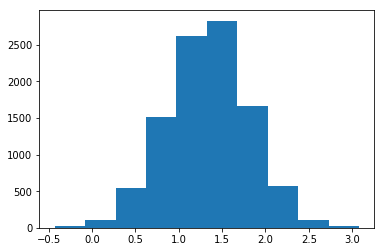

In [8]:
boot_sample=[]
for _ in range(10000):
    sample=sample_data.sample(200,replace=True)
    cd=sample[sample['drinks_coffee']==True]['height'].mean()
    ncd=sample[sample['drinks_coffee']==False]['height'].mean()
    boot_sample.append(cd-ncd)
plt.hist(boot_sample)

In [9]:
np.percentile(boot_sample,0.5),np.percentile(boot_sample,99.5)

(0.10258900080919674, 2.5388333707966284)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

(array([    9.,    95.,   516.,  1570.,  2747.,  2804.,  1614.,   524.,
          114.,     7.]),
 array([ 2.95019802,  3.21067614,  3.47115426,  3.73163238,  3.99211051,
         4.25258863,  4.51306675,  4.77354487,  5.034023  ,  5.29450112,
         5.55497924]),
 <a list of 10 Patch objects>)

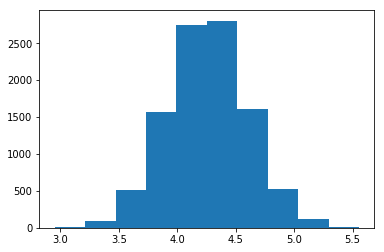

In [17]:
age_sample=[]
for _ in range(10000):
    sample=sample_data.sample(200,replace=True)
    old=sample[sample['age']!='<21']['height'].mean()
    young=sample[sample['age']=='<21']['height'].mean()
    age_sample.append(old-young)
plt.hist(age_sample)

In [16]:
np.percentile(age_sample,0.5),np.percentile(age_sample,99.5)

(3.3502745897258372, 5.1090599001897354)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

(array([    4.,    54.,   390.,  1413.,  2678.,  3024.,  1752.,   552.,
          119.,    14.]),
 array([-3.44885318, -3.13776917, -2.82668516, -2.51560114, -2.20451713,
        -1.89343312, -1.58234911, -1.27126509, -0.96018108, -0.64909707,
        -0.33801306]),
 <a list of 10 Patch objects>)

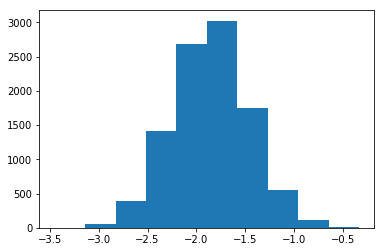

In [19]:
diffs = []
for _ in range(10000):
    sample = sample_data.sample(200, replace = True)
    coffee = sample.query("age == '<21' and drinks_coffee == True")['height'].mean()
    noncoffee = sample.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs.append(coffee-noncoffee)
    
plt.hist(diffs)

In [21]:
np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)

(-2.6135233884205724, -1.0764344075384065)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

(array([  1.00000000e+01,   1.27000000e+02,   9.88000000e+02,
          3.10700000e+03,   3.66000000e+03,   1.69700000e+03,
          3.55000000e+02,   4.70000000e+01,   7.00000000e+00,
          2.00000000e+00]),
 array([-5.80729099, -5.16742569, -4.52756038, -3.88769507, -3.24782976,
        -2.60796445, -1.96809914, -1.32823383, -0.68836852, -0.04850321,
         0.5913621 ]),
 <a list of 10 Patch objects>)

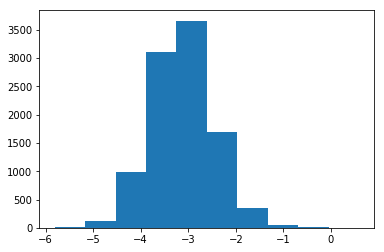

In [22]:
diffs2 = []
for _ in range(10000):
    sample = sample_data.sample(200, replace = True)
    coffee = sample.query("age != '<21' and drinks_coffee == True")['height'].mean()
    noncoffee = sample.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs2.append(coffee-noncoffee)
    
plt.hist(diffs2)

In [23]:
np.percentile(diffs2, 2.5), np.percentile(diffs2, 97.5)

(-4.3679284960258311, -1.8065555122634016)